# Pràctica 7 - Aplicacions Mèdiques de l'Enginyeria I

### Marc Biosca - Desembre 2024

In [1]:
# Importing necessary libraries

import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

/Users/marc/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
main_path = '/Users/marc/Desktop/P7_Epilepsia/Practica_SISCOM_24'

# Load the images
name_ictal_og = 'ICTAL.nii'                         # Original ictal image
name_interictal_og = 'INTERICTAL.nii'               # Original interictal image
name_ictal_realigned = 'wICTAL.nii'                 # Realigned ictal image
name_interictal_realigned = 'wrINTERICTAL.nii'      # Realigned interictal image
name_mri = 'RM.nii'                                 # Original MRI image
name_mri_brain = 'RM_brain.nii.gz'                  # Brain extracted MRI image
name_mri_brain_mask = 'RM_brain_mask.nii.gz'        # Brain mask MRI image

## Image Exploration

/Users/marc/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(
/Users/marc/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


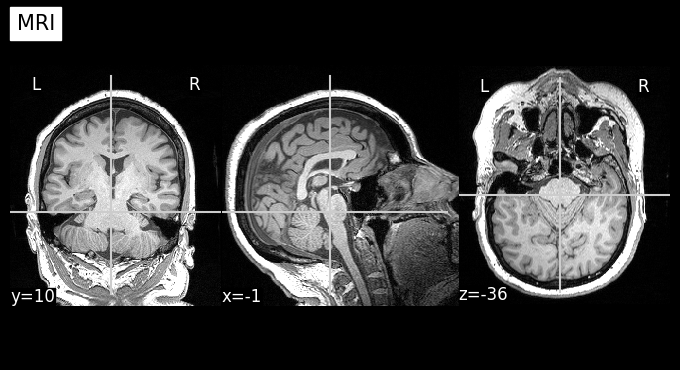

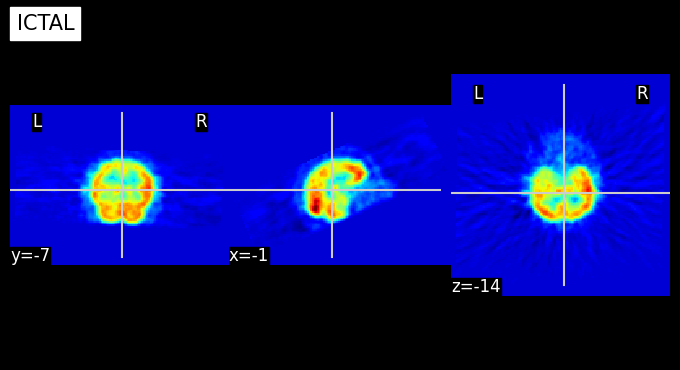

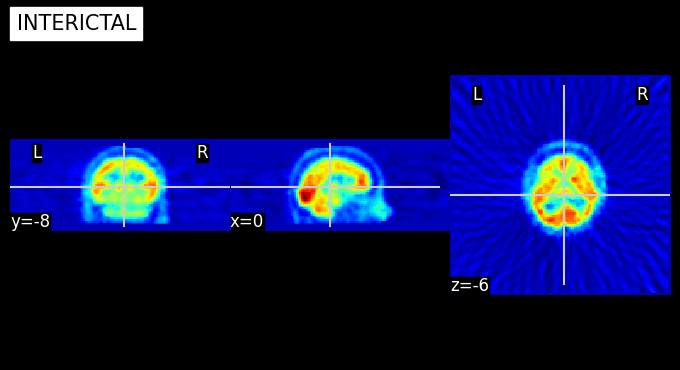

In [3]:
# Load and view the original images (ICTAL and INTERICTAL and MRI)

# Load the images
img_ictal_og = nib.load(os.path.join(main_path, name_ictal_og))
img_interictal_og = nib.load(os.path.join(main_path, name_interictal_og))
img_mri = nib.load(os.path.join(main_path, name_mri))

# Plot the images
plotting.plot_anat(img_mri, vmin=0, vmax=350, cmap='gray', title='MRI')
plotting.plot_anat(img_ictal_og, vmin=-10, vmax=120, cmap='jet', title='ICTAL')
plotting.plot_anat(img_interictal_og, vmin=-10, vmax=190, cmap='jet', title='INTERICTAL')


## Mask Application

**Mask Calculation** was done using FSL's BET (Brain Extraction Tool) with the terminal command: `bet RM.nii RM_brain -m` 


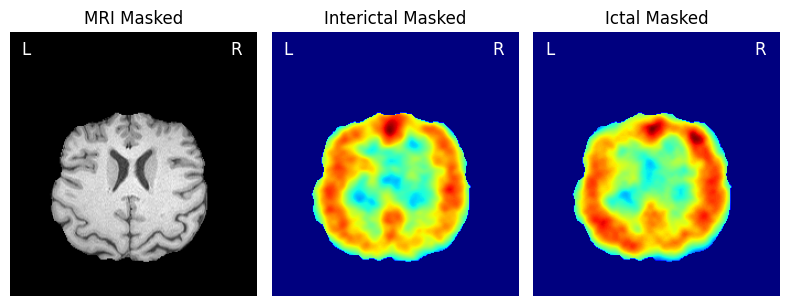

Images saved


In [4]:
# Load both SPECT images Ictal and Interictal
ictal_img = nib.load(os.path.join(main_path, name_ictal_realigned))
interictal_img = nib.load(os.path.join(main_path, name_interictal_realigned))
brain_mask = nib.load(os.path.join(main_path, name_mri_brain_mask))
brain = nib.load(os.path.join(main_path, name_mri_brain))

ictal_data = ictal_img.get_fdata()
interictal_data = interictal_img.get_fdata()
mask_data = brain_mask.get_fdata()
brain_data = brain.get_fdata()

# Apply the mask
masked_ictal_data = np.where(mask_data, ictal_data, 0)
masked_interictal_data = np.where(mask_data, interictal_data, 0)

# Rotate the images 90 degrees to the left (3 times 90 degrees = 270 degrees)
masked_ictal_data = np.rot90(masked_ictal_data, 3)
masked_interictal_data = np.rot90(masked_interictal_data, 3)
brain_data = np.rot90(brain_data, 3)

# Set up subplots for side-by-side images
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# Plot MRI data
axes[0].imshow(brain_data[:, :, 156], cmap='gray')
axes[0].set_title('MRI Masked')
axes[0].text(10, 20, 'L', color='white', fontsize=12)
axes[0].text(200, 20, 'R', color='white', fontsize=12)
axes[0].axis('off')  # Remove axis numbers and ticks

# Plot Interictal SPECT data
axes[1].imshow(masked_interictal_data[:, :, 156], cmap='jet')
axes[1].set_title('Interictal Masked')
axes[1].text(10, 20, 'L', color='white', fontsize=12)
axes[1].text(200, 20, 'R', color='white', fontsize=12)
axes[1].axis('off')

# Plot Ictal SPECT data
axes[2].imshow(masked_ictal_data[:, :, 156], cmap='jet')
axes[2].set_title('Ictal Masked')
axes[2].text(10, 20, 'L', color='white', fontsize=12)
axes[2].text(200, 20, 'R', color='white', fontsize=12)
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# Save the masked SPECT images
save = True

masked_ictal_data = np.rot90(masked_ictal_data, 1)
masked_interictal_data = np.rot90(masked_interictal_data, 1)
brain_data = np.rot90(brain_data, 1)

if save:
    masked_ictal_img = nib.Nifti1Image(masked_ictal_data, ictal_img.affine)
    masked_interictal_img = nib.Nifti1Image(masked_interictal_data, interictal_img.affine)

    nib.save(masked_ictal_img, os.path.join(main_path, 'masked_ictal.nii.gz'))
    nib.save(masked_interictal_img, os.path.join(main_path, 'masked_interictal.nii.gz'))
    
    print('Images saved')



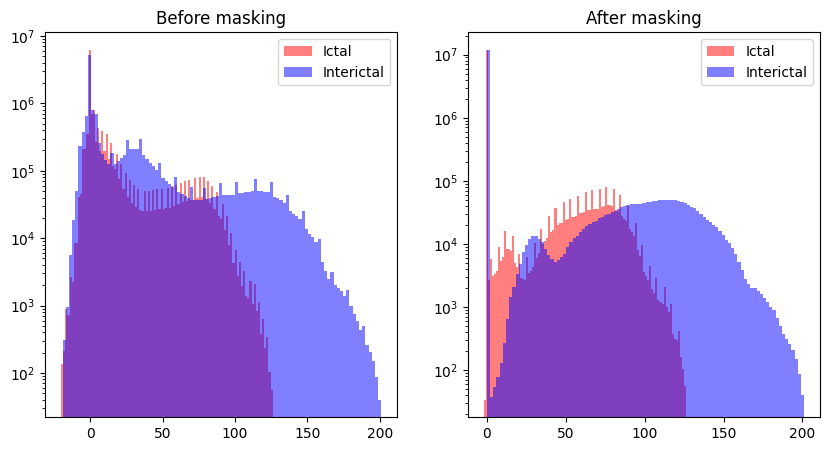

In [5]:
# --------- HISTOGRAM ANALYSIS PRE vs. POST MASKING ---------

# Plot the histogram of the ICTAL and INTERICTAL images before and after masking
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(ictal_data.flatten(), bins=100, color='r', alpha=0.5, label='Ictal')
axes[0].hist(interictal_data.flatten(), bins=100, color='b', alpha=0.5, label='Interictal')
axes[0].set_title('Before masking')
# log scale y axis
axes[0].set_yscale('log')
axes[0].legend()

axes[1].hist(masked_ictal_data.flatten(), bins=100, color='r', alpha=0.5, label='Ictal')
axes[1].hist(masked_interictal_data.flatten(), bins=100, color='b', alpha=0.5, label='Interictal')
axes[1].set_title('After masking')
# log scale y axis
axes[1].set_yscale('log')
axes[1].legend()

plt.show()

Consequences of Masking:

1. Masking reduced low-intensity voxels and increased the signal-to-noise ratio, effectively isolating relevant regions.

2. The absence of negative values indicates successful background noise removal.

3. The growth in voxels with intensity 0 is expected, as masking sets the background to 0, focusing solely on brain areas.  

## Normalization

Most common method in the literature is Mean normalization. Most articles cite the methodology based on these articles by O'Brien et. al.:

1. O'Brien, T. J., So, E. L., Mullan, B. P., Hauser, M. F., Brinkmann, B. H., Bohnen, N. I., Hanson, D., Cascino, G. D., Jack, C. R., Jr, & Sharbrough, F. W. (1998). Subtraction ictal SPECT co-registered to MRI improves clinical usefulness of SPECT in localizing the surgical seizure focus. Neurology, 50(2), 445–454. https://doi.org/10.1212/wnl.50.2.445

2. O'Brien, T. J., So, E. L., Cascino, G. D., Hauser, M. F., Marsh, W. R., Meyer, F. B., Sharbrough, F. W., & Mullan, B. P. (2004). Subtraction SPECT coregistered to MRI in focal malformations of cortical development: localization of the epileptogenic zone in epilepsy surgery candidates. Epilepsia, 45(4), 367–376. https://doi.org/10.1111/j.0013-9580.2004.54703.x

3. O'Brien, T. J., O'Connor, M. K., Mullan, B. P., Brinkmann, B. H., Hanson, D., Jack, C. R., & So, E. L. (1998). Subtraction ictal SPET co-registered to MRI in partial epilepsy: description and technical validation of the method with phantom and patient studies. Nuclear medicine communications, 19(1), 31–45. https://doi.org/10.1097/00006231-199801000-00006

In [6]:
# --------- NORMALIZATION ---------

def mean_normalization(image_path, output_name):
    # Load the image
    img = nib.load(image_path)
    data = img.get_fdata()
    
    # Compute the mean intensity of the image
    mean_intensity = np.mean(data[data!=0])
    
    # Normalize the image by subtracting the mean intensity and dividing by the standard deviation
    normalized_data = data * (100/mean_intensity)
    
    # Save the normalized image
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    nib.save(normalized_img, output_name)
    
def median_normalization(image_path, output_name):
    # Load the image
    img = nib.load(image_path)
    data = img.get_fdata()
    
    # Compute the median intensity of the image -> exclude zero values
    median_intensity = np.median(data[data > 0])
    
    # Normalize the image by subtracting the median intensity and dividing by the standard deviation
    normalized_data = data * (100/median_intensity)
    
    # Save the normalized image
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    nib.save(normalized_img, output_name)
    
def z_normalization(image_path, output_name):
    # Load the image
    img = nib.load(image_path)
    data = img.get_fdata()
    
    # Compute the mean and standard deviation of the image
    mean_intensity = np.mean(data[data!=0])
    std_intensity = np.std(data[data!=0])
    
    # Normalize the image by subtracting the mean intensity and dividing by the standard deviation
    normalized_data = (data - mean_intensity) / std_intensity
    
    # Save the normalized image
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    nib.save(normalized_img, output_name)

In [7]:
# --------- APPLY NORMALIZATION ---------

# Normalize the masked images Ictal and Interictal using MEAN
mean_normalization(os.path.join(main_path, 'masked_ictal.nii.gz'), os.path.join(main_path, 'normalized_mean_ictal.nii.gz'))
mean_normalization(os.path.join(main_path, 'masked_interictal.nii.gz'), os.path.join(main_path, 'normalized_mean_interictal.nii.gz'))

# Normalize the original images Ictal and Interictal using MEDIAN
median_normalization(os.path.join(main_path, 'masked_ictal.nii.gz'), os.path.join(main_path, 'normalized_median_ictal.nii.gz'))
median_normalization(os.path.join(main_path, 'masked_interictal.nii.gz'), os.path.join(main_path, 'normalized_median_interictal.nii.gz'))

# Normalize the original images Ictal and Interictal using Z-score
z_normalization(os.path.join(main_path, 'masked_ictal.nii.gz'), os.path.join(main_path, 'normalized_z_ictal.nii.gz'))
z_normalization(os.path.join(main_path, 'masked_interictal.nii.gz'), os.path.join(main_path, 'normalized_z_interictal.nii.gz'))


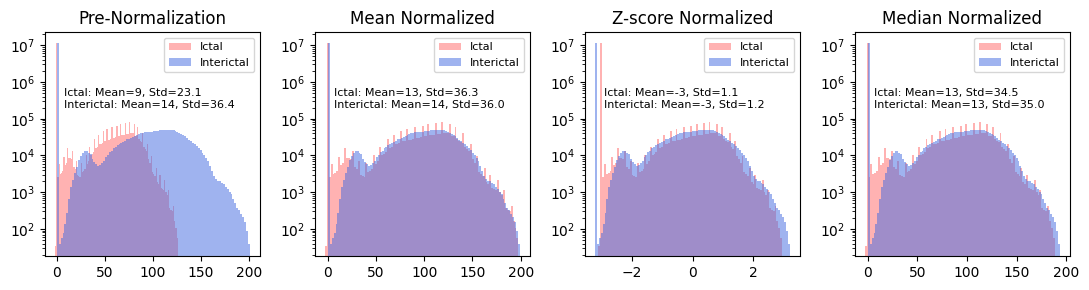

In [8]:
# --------- HISTOGRAM ANALYSIS PRE vs. POST NORMALIZATION ---------

def get_ictal_interictal_data(mode='mean'):
    if mode == 'mean':
        ictal_img = nib.load(os.path.join(main_path, 'normalized_mean_ictal.nii.gz'))
        interictal_img = nib.load(os.path.join(main_path, 'normalized_mean_interictal.nii.gz'))
    elif mode == 'median':
        ictal_img = nib.load(os.path.join(main_path, 'normalized_median_ictal.nii.gz'))
        interictal_img = nib.load(os.path.join(main_path, 'normalized_median_interictal.nii.gz'))
    elif mode == 'z':
        ictal_img = nib.load(os.path.join(main_path, 'normalized_z_ictal.nii.gz'))
        interictal_img = nib.load(os.path.join(main_path, 'normalized_z_interictal.nii.gz'))
    else:
        raise ValueError('Invalid mode. Choose between "mean", "median" or "z"')
    
    ictal_data = ictal_img.get_fdata()
    interictal_data = interictal_img.get_fdata()
    
    return ictal_data, interictal_data

# Get the normalized images
normalized_mean_ictal_data, normalized_mean_interictal_data = get_ictal_interictal_data('mean')
normalized_median_ictal_data, normalized_median_interictal_data = get_ictal_interictal_data('median')
normalized_z_ictal_data, normalized_z_interictal_data = get_ictal_interictal_data('z')

methods = ['mean', 'z', 'median']
names = ['Mean', 'Z-score', 'Median']

# Plot histograms for pre-normalized images
fig, axes = plt.subplots(1, 4, figsize=(11, 3))

# First subplot: pre-normalized data
axes[0].hist(masked_ictal_data.flatten(), bins=100, color='red', alpha=0.3, label='Ictal')
axes[0].hist(masked_interictal_data.flatten(), bins=100, color='royalblue', alpha=0.5, label='Interictal')
axes[0].set_title('Pre-Normalization')
mean_ictal, std_ictal = round(np.mean(masked_ictal_data)), round(np.std(masked_ictal_data), 1)
mean_interictal, std_interictal = round(np.mean(masked_interictal_data)), round(np.std(masked_interictal_data), 1)
axes[0].text(0.09, 0.75, f'Ictal: Mean={mean_ictal}, Std={std_ictal}\n'
                        f'Interictal: Mean={mean_interictal}, Std={std_interictal}', 
            transform=axes[0].transAxes, fontsize=8, ha='left', va='top')
axes[0].set_yscale('log')
axes[0].legend(fontsize=8)

# Next 3 subplots: normalized histograms
for i, ax in enumerate(axes[1:]):
    # Extract ictal and interictal data for the current method
    ictal_data = eval(f'normalized_{methods[i].lower()}_ictal_data').flatten()
    interictal_data = eval(f'normalized_{methods[i].lower()}_interictal_data').flatten()
    
    # Plot overlapping histograms with transparency
    ax.hist(ictal_data, bins=100, color='red', alpha=0.3, label='Ictal')
    ax.hist(interictal_data, bins=100, color='royalblue', alpha=0.5, label='Interictal')
    
    # Add titles and statistics
    ax.set_title(f'{names[i]} Normalized')
    mean_ictal, std_ictal = round(np.mean(ictal_data)), round(np.std(ictal_data), 1)
    mean_interictal, std_interictal = round(np.mean(interictal_data)), round(np.std(interictal_data), 1)
    ax.text(0.09, 0.75, f'Ictal: Mean={mean_ictal}, Std={std_ictal}\n'
                        f'Interictal: Mean={mean_interictal}, Std={std_interictal}', 
            transform=ax.transAxes, fontsize=8, ha='left', va='top')
    
    # Set log scale for y-axis
    ax.set_yscale('log')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


## Image Subtraction

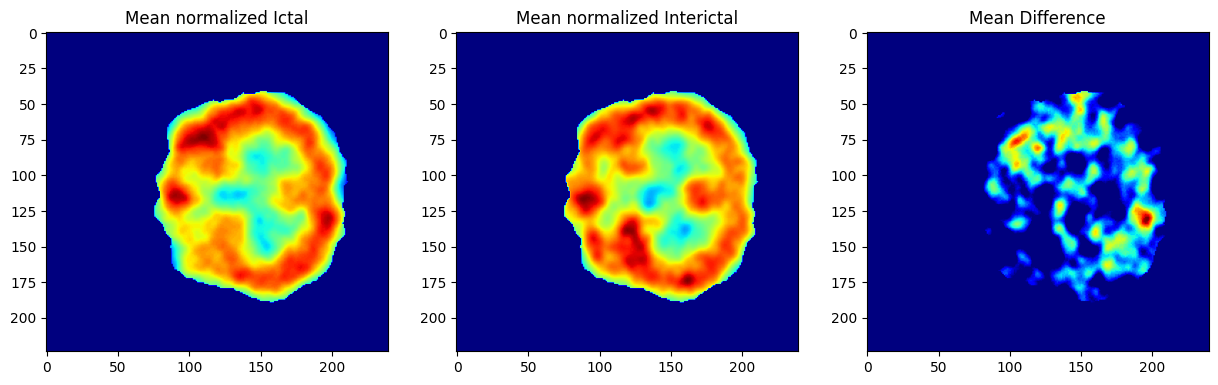

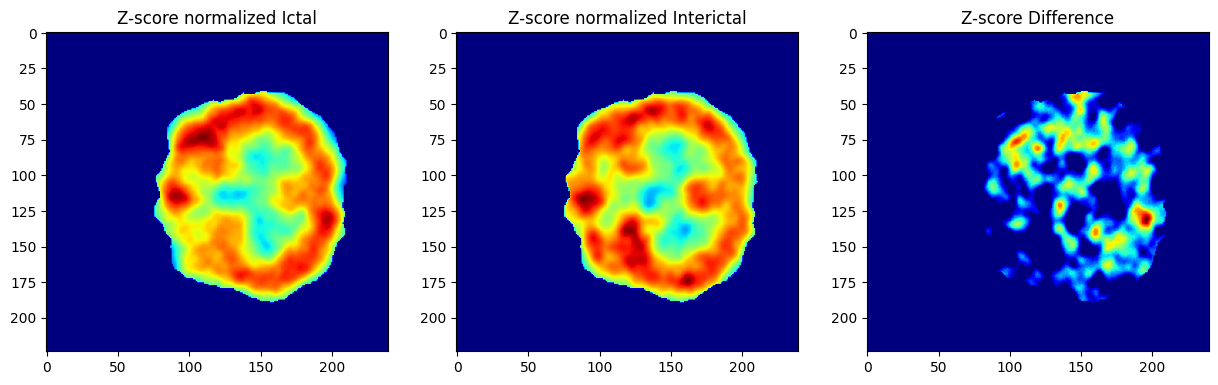

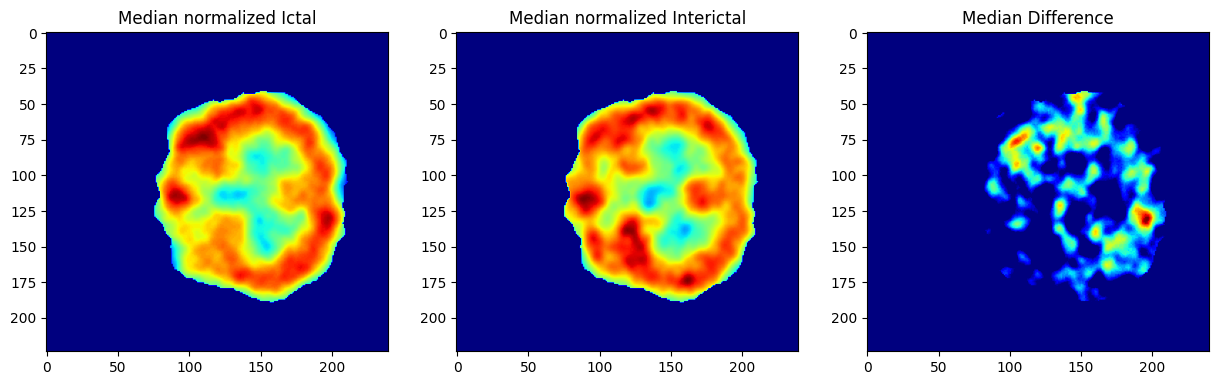

In [9]:
# --------- DIFFERENCE IMAGES ---------

# We subtract the interictal image from the ictal image, as we expect the ictal image to have higher values at the focus
diff_mean = normalized_mean_ictal_data - normalized_mean_interictal_data
diff_median = normalized_median_ictal_data - normalized_median_interictal_data
diff_z = normalized_z_ictal_data - normalized_z_interictal_data

# Apply the mask to the difference images
diff_mean = np.where(mask_data, diff_mean, 0)
diff_median = np.where(mask_data, diff_median, 0)
diff_z = np.where(mask_data, diff_z, 0)

# Plot the difference image along with the icatl and interictal images


methods = ['mean', 'z', 'median']
names = ['Mean', 'Z-score', 'Median']

for i in range(3):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(eval(f'normalized_{methods[i].lower()}_ictal_data')[:, :, 150], cmap='jet')
    axes[0].set_title(f'{names[i]} normalized Ictal')
    axes[1].imshow(eval(f'normalized_{methods[i].lower()}_interictal_data')[:, :, 150], cmap='jet')
    axes[1].set_title(f'{names[i]} normalized Interictal')
    axes[2].imshow(eval(f'diff_{methods[i].lower()}')[:, :, 150], cmap='jet', vmin=0)
    axes[2].set_title(f'{names[i]} Difference')
    plt.show()
    

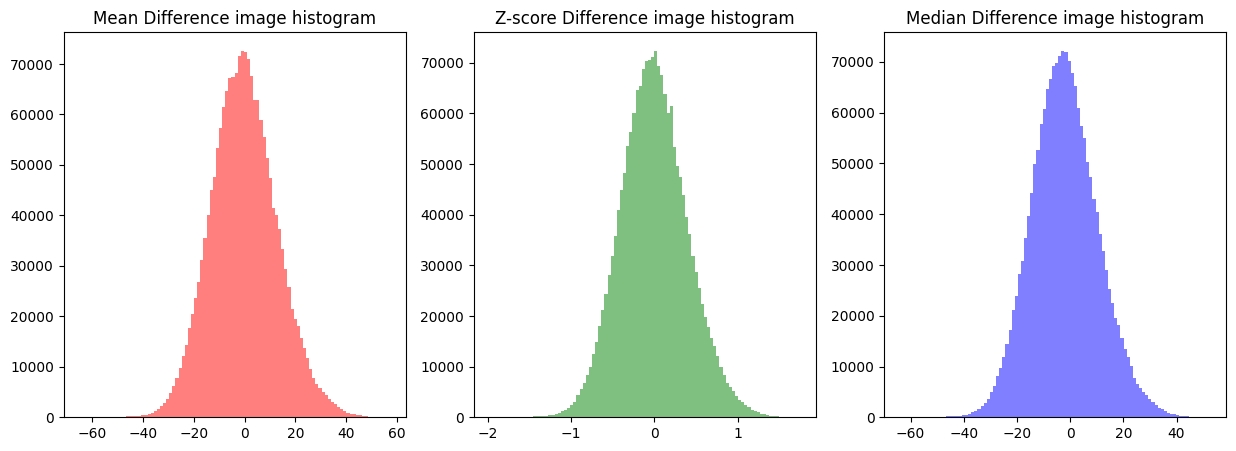

In [10]:
# --------- HISTOGRAM ANALYSIS OF DIFFERENCE IMAGES ---------

histogram_mean = diff_mean.flatten()
histogram_median = diff_median.flatten()
histogram_z = diff_z.flatten()

# Remove zero values
histogram_mean = histogram_mean[histogram_mean != 0]
histogram_median = histogram_median[histogram_median != 0]
histogram_z = histogram_z[np.abs(histogram_z) != 0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(histogram_mean, bins=100, color='r', alpha=0.5)
axes[0].set_title('Mean Difference image histogram')

axes[2].hist(histogram_median, bins=100, color='b', alpha=0.5)
axes[2].set_title('Median Difference image histogram')

axes[1].hist(histogram_z, bins=100, color='g', alpha=0.5)
axes[1].set_title('Z-score Difference image histogram')

plt.show()


In [11]:
# --------- THRESHOLDING THE DIFFERENCE IMAGES ---------

alpha = 2.5 # Set the significance level for the threshold

# Define a threshold as 3 times the standard deviation of the histogram - Quite restrictive
threshold_mean = alpha * np.std(histogram_mean)
threshold_median = alpha * np.std(histogram_median)
threshold_z = alpha * np.std(histogram_z)

print(f'Threshold for Mean: {threshold_mean}')
print(f'Threshold for Median: {threshold_median}')
print(f'Threshold for Z-score: {threshold_z}')

# Apply the threshold to the difference image
thresholded_diff_mean = np.where(diff_mean > threshold_mean, diff_mean, 0)
thresholded_diff_median = np.where(diff_median > threshold_median, diff_median, 0)
thresholded_diff_z = np.where(diff_z > threshold_z, diff_z, 0)

# Save the thresholded difference image
save_final = True

if save_final:
    thresholded_mean_diff_img = nib.Nifti1Image(thresholded_diff_mean, ictal_img.affine, ictal_img.header)
    nib.save(thresholded_mean_diff_img, os.path.join(main_path, 'thresholded_mean_diff.nii.gz'))
    threshold_median_diff_img = nib.Nifti1Image(thresholded_diff_median, ictal_img.affine, ictal_img.header)
    nib.save(threshold_median_diff_img, os.path.join(main_path, 'thresholded_median_diff.nii.gz'))
    threshold_z_diff_img = nib.Nifti1Image(thresholded_diff_z, ictal_img.affine, ictal_img.header)
    nib.save(threshold_z_diff_img, os.path.join(main_path, 'thresholded_z_diff.nii.gz'))
    print('Thresholded difference images saved')


Threshold for Mean: 32.75953431017136
Threshold for Median: 31.245925220224983
Threshold for Z-score: 1.004207794341465
Thresholded difference images saved


## Overlay with MRI

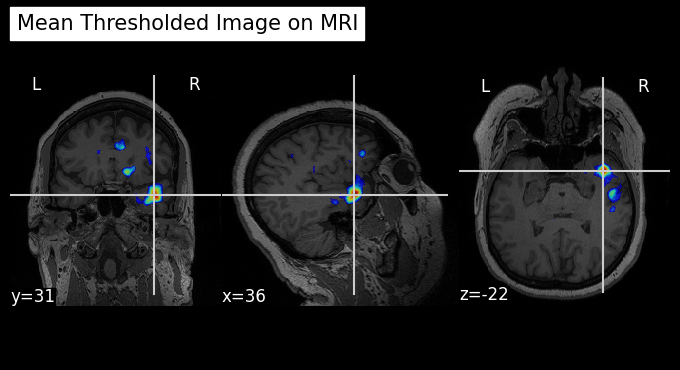

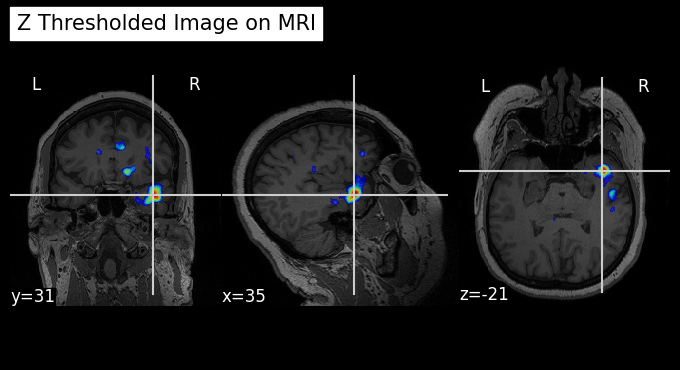

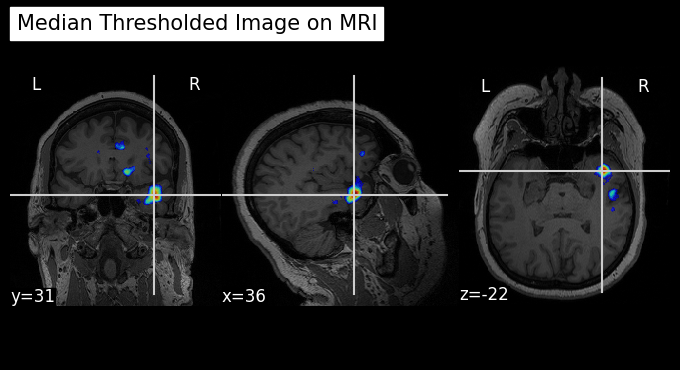

In [12]:
# --------- VISUALIZATION OF THRESHOLDED DIFFERENCE IMAGES OVERLAYED ON MRI ---------

methods = ['mean', 'z', 'median']
images_diff = [f'thresholded_{method}_diff.nii.gz' for method in methods]

# Load the thresholded difference images
images_diff = [nib.load(os.path.join(main_path, image)) for image in images_diff]

# Plotting
for i, method in enumerate(methods):
    plotting.plot_roi(images_diff[i], bg_img=img_mri, cmap='jet', title=f'{method.capitalize()} Thresholded Image on MRI')
    plt.show()


## Atlas Superposition

Using *FSL FLIRT*, a linear transformation matrix was computed to align the MNI atlas with the subject's T1-weighted MRI. The *convert_xfm* tool was then used to invert the transformation matrix, converting it from MNI space to the subject's space. Finally, the inverted transformation was applied with *FLIRT* to warp the atlas into the subject's MRI space, achieving precise anatomical localization. (https://web.mit.edu/fsl_v5.0.10/fsl/doc/wiki/FLIRT(2f)UserGuide.html)

## Images Results

The resultant images from these steps were examined using the external application **ITK-SNAP**. All images generated during these steps can be downloaded from the following GitHub repository:

https://github.com/mbioscma/P7_Epilepsy_MarcBiosca
